![imagenes](logo.png)

# Enunciado

Determine el coeficiente de correlación muestral y valore la regresión lineal realizada:

X|Y
:--:|:--:
-2|40
0|35
5|30
9|25
15|20
20|15

---

# Solución

Haremos la regresión lineal basada en nuestra [guía de regresiones](https://nbviewer.org/github/scidatmath2020/Inferencia-Estad-stica-2022/blob/main/C09.4%20Regresi%C3%B3n%20lineal%20%28Gu%C3%ADa%20para%20hacer%20una%20buena%20regresi%C3%B3n%20lineal%29.ipynb) 

In [46]:
data = data.frame(X=c(-2,0,5,9,15,20),Y=c(40,35,30,25,20,15))

In [47]:
cor(data)

,X,Y
X,1.0000000,-0.9922331
Y,-0.9922331,1.0000000


In [48]:
# Construimos el modelo
resultado_regresion <- lm(Y~X,data=data)
summary(resultado_regresion)


Call:
lm(formula = Y ~ X, data = data)

Residuals:
      1       2       3       4       5       6 
 1.8446 -0.9882 -0.5702 -1.2358  0.2658  0.6838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.98819    0.75177   47.87 1.14e-06 ***
X           -1.08360    0.06792  -15.95 9.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.301 on 4 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9807 
F-statistic: 254.5 on 1 and 4 DF,  p-value: 9.025e-05


Se observa que el modelo explica el 98.45% de la variabilidad de los datos.

In [49]:
#### Verificamos la normalidad de los residuos

#library(fBasics)
shapiroTest(resultado_regresion$residuals)


Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9409
  P VALUE:
    0.6661 

Description:
 Sun Oct 23 02:41:57 2022 by user: hp


Como el p-valor es grande, hay evidencia de que los residuos son gaussianos.

In [50]:
#### Homocedasticidad de los residuos

#library(lmtest)

bptest(resultado_regresion)


	studentized Breusch-Pagan test

data:  resultado_regresion
BP = 2.5105, df = 1, p-value = 0.1131


Como el p-valor es grande, hay evidencia de la homocedasticidad de los residuos

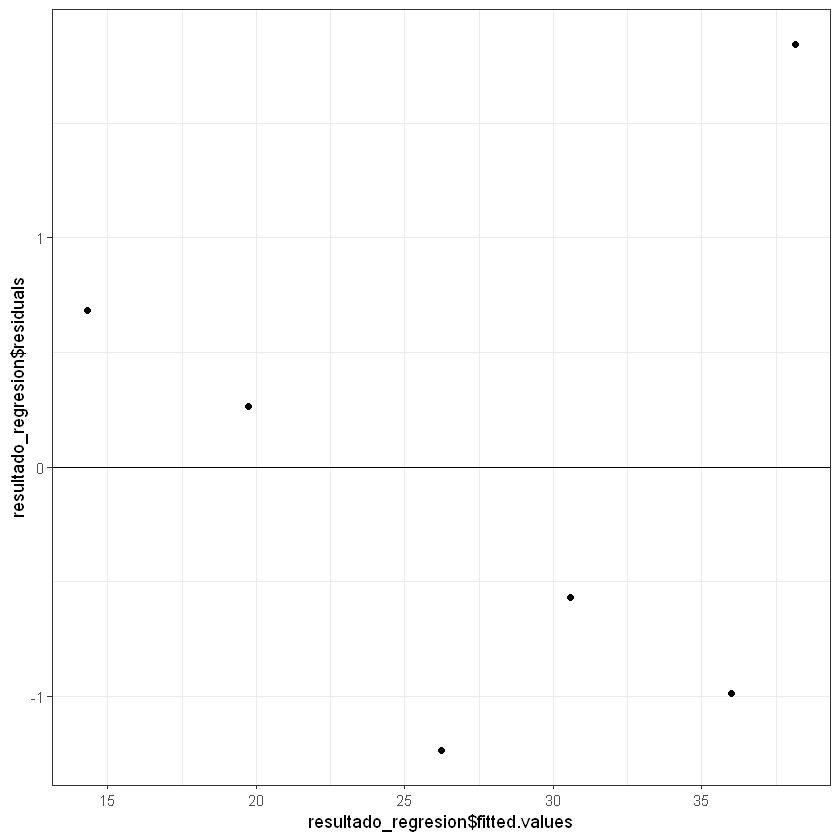

In [51]:
#### Verificamos la homocedasticidad gráficamente

#library(ggplot2)

ggplot(data = data, aes(resultado_regresion$fitted.values, resultado_regresion$residuals)) +
    geom_point() +
    geom_hline(yintercept = 0) +
    theme_bw()

In [52]:
#### Veremos si los residuos son independientes

#library(car)

dwt(resultado_regresion,alternative="two.sided")

 lag Autocorrelation D-W Statistic p-value
   1      -0.1036152      1.635537   0.226
 Alternative hypothesis: rho != 0

Como el p-valor es grande, tenemos evidencia de que los residuos son independientes

           Test stat Pr(>|Test stat|)  
X             1.8927          0.15473  
Tukey test    1.8927          0.05839 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


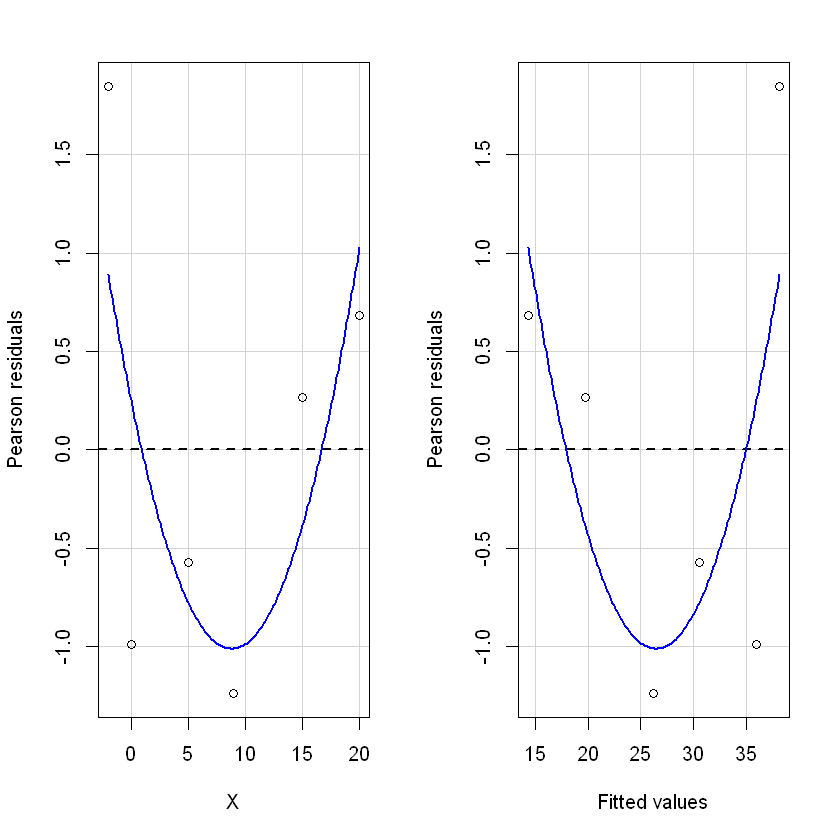

In [53]:
#### Veamos si el modelo es aditivo

residualPlots(resultado_regresion,plot=TRUE)

Dado que el p-valor cae en la zona crepuscular, definida como el intervalo [0.05,0.1], **no podemos decir si el modelo es o no aditivo**.

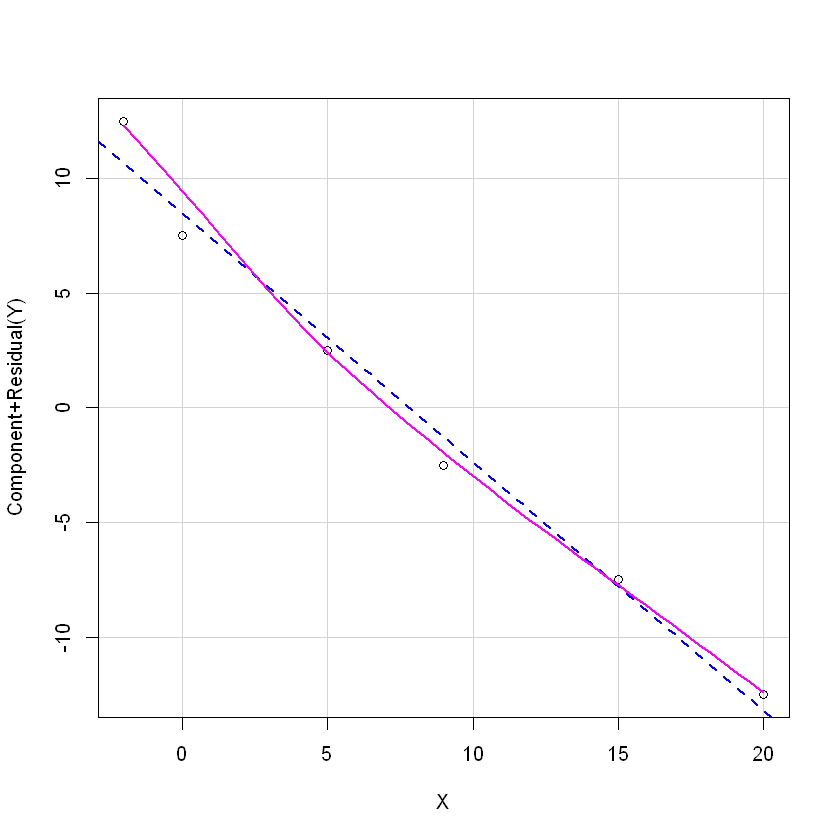

In [54]:
# Veamos la linealidad del modelo

crPlots(resultado_regresion)

Se visualiza que el modelo sí es lineal.

In [55]:
#### Observaciones anómalas

## Leverages

which(hatvalues(resultado_regresion)>2*(1+1)/6)

named integer(0)

No hay leverages

In [56]:
## Outliers

outlierTest(resultado_regresion)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
  rstudent unadjusted p-value Bonferroni p
1 4.739981           0.017807      0.10684

No hay outliers

In [57]:
## Observaciones peligrosas

which(cooks.distance(resultado_regresion)>4/(6-1-2))

named integer(0)

No hay observaciones peligrosas

In [58]:
#### Estudiamos los intervalos de confianza para b0 y b1

confint(resultado_regresion)

,2.5 %,97.5 %
(Intercept),33.900931,38.0754439
X,-1.272184,-0.8950131


In [59]:
#### Estudiamos la significación para b0 y b1
summary(resultado_regresion)


Call:
lm(formula = Y ~ X, data = data)

Residuals:
      1       2       3       4       5       6 
 1.8446 -0.9882 -0.5702 -1.2358  0.2658  0.6838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.98819    0.75177   47.87 1.14e-06 ***
X           -1.08360    0.06792  -15.95 9.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.301 on 4 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9807 
F-statistic: 254.5 on 1 and 4 DF,  p-value: 9.025e-05


Observamos que la variable ``X`` es fuertemente significativa.

In [60]:
#### Realizamos la predicción para X=47

newdata = data.frame(X=47)

predict.lm(resultado_regresion,newdata,interval = "prediction",level = 0.95)

fit,lwr,upr
-14.94094,-23.29422,-6.587651


`geom_smooth()` using formula 'y ~ x'


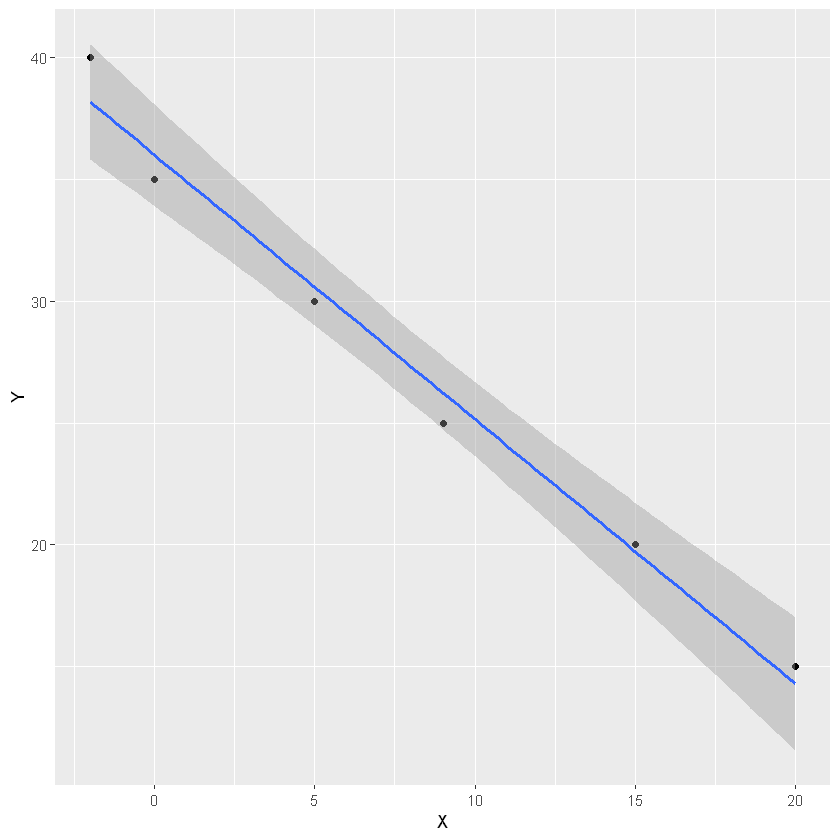

In [61]:
#### Graficamos la regresión:

ggplot(data=data,aes(x=X,y=Y)) +
    geom_point() +
    geom_smooth(method="lm")